In [128]:
# Observable Trends #1
#   Tweet Polarity based off recent events. Fluctuates everyday.

# Observable Trends #2
#   Based off the current data, it seems CBS is tweeting a more positive tweets and steering clear of what CNN, FOX, and NYT is reporting.

# Observable Trends #3
#   CNN and NYT tweeting could be tweeting similar stories/tweets as their tweet polarity is similar.

In [99]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [100]:
target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

# Tweet Texts
tweet_texts = []

# List to hold results
results_list = []

#Loop through all news organizations
for target in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    number_list = []
    tweet_list = []
    
    counter = 0
    
    # Create a loop to iteratively run API requests
    for x in range(1, 6):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter += 1
            number_list.append(counter)
            tweet_list.append(tweet["text"])
            
    sent ={
        "User": target,
        "Compound": compound_list,
        "Positive": positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list,
        "Tweet Count": len(compound_list),
        "Number": number_list,
        "Tweets": tweet_list
        }
    
    # Append airline results to 'results_list'
    results_list.append(sent)
            

In [111]:
#Define variables for x and y values for scatter plot 
#BBCNews
y_bbc = results_list[0]["Compound"]
x_bbc = results_list[0]["Number"]

#CBS
y_cbs = results_list[1]["Compound"]
x_cbs = results_list[1]["Number"]

#CNN
y_cnn = results_list[2]["Compound"]
x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = results_list[3]["Compound"]
x_fox = results_list[3]["Number"]

#nytimes
y_nyt = results_list[4]["Compound"]
x_nyt = results_list[4]["Number"]

In [112]:
news_df = pd.DataFrame(results_list).set_index("User")
news_df

,Compound,Negative,Neutral,Number,Positive,Tweet Count,Tweets
User,,,,,,,
@BBC,"[-0.4215, 0.0, 0.4588, 0.7351, 0.4404, -0.1779...","[0.811, 1.0, 0.812, 0.744, 0.896, 0.909, 1.0, ...","[0.189, 0.0, 0.0, 0.0, 0.0, 0.091, 0.0, 0.0, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.188, 0.256, 0.104, 0.0, 0.0, 0.0,...",100,[🍜🍜🍜\nThis Korean man is tackling loneliness b...
@CBS,"[0.8442, 0.0, 0.296, 0.6809, 0.5574, 0.0, 0.36...","[0.676, 1.0, 0.891, 0.449, 0.805, 1.0, 0.839, ...","[0.0, 0.0, 0.0, 0.213, 0.0, 0.0, 0.0, 0.0, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.324, 0.0, 0.109, 0.338, 0.195, 0.0, 0.161, ...",100,[You may be surprised to learn some of your fa...
@CNN,"[0.0, 0.0, 0.4767, 0.0, -0.4019, 0.0, -0.765, ...","[1.0, 1.0, 0.773, 1.0, 0.876, 1.0, 0.546, 0.91...","[0.0, 0.0, 0.0, 0.0, 0.124, 0.0, 0.366, 0.0, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.227, 0.0, 0.0, 0.0, 0.088, 0.086,...",100,[President Trump’s pick for secretary of state...
@FoxNews,"[0.0, 0.3182, 0.4466, 0.0, -0.6705, 0.0772, 0....","[1.0, 0.635, 0.789, 1.0, 0.744, 0.724, 0.78, 0...","[0.0, 0.122, 0.0, 0.0, 0.256, 0.131, 0.0, 0.34...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.243, 0.211, 0.0, 0.0, 0.145, 0.22, 0.1...",100,[The Senate Foreign Relations Committee holds ...
@nytimes,"[0.0, 0.0, -0.34, -0.4767, 0.0, 0.5423, -0.636...","[1.0, 1.0, 0.882, 0.866, 1.0, 0.8, 0.826, 0.58...","[0.0, 0.0, 0.118, 0.134, 0.0, 0.0, 0.174, 0.41...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, ...",100,"[A scientist behind Dolly the sheep, whose wor..."


In [113]:
#save DataFrame to csv
news_df.to_csv("Sentiment_Data.csv")

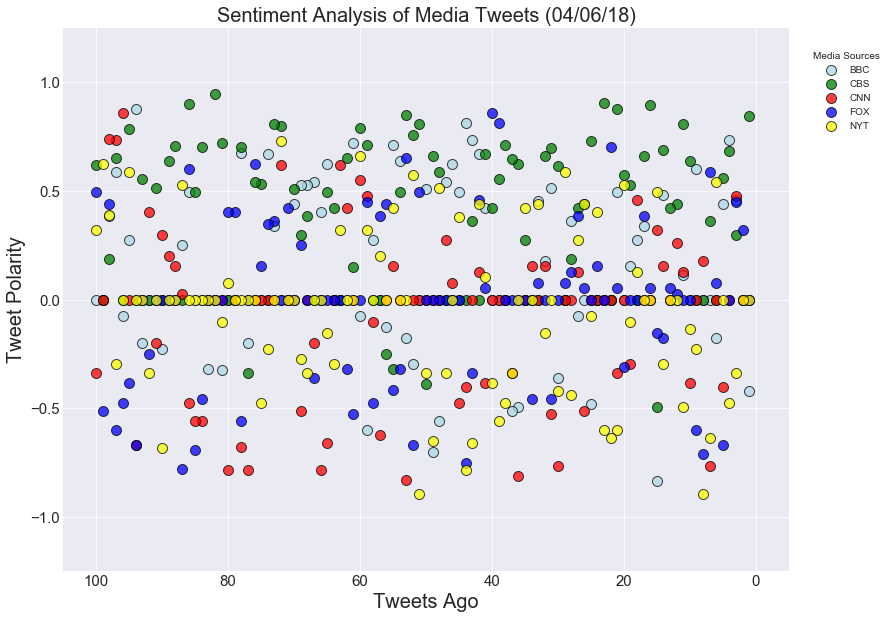

In [120]:

fix, ax  = plt.subplots(figsize =(13,10))

sns.set_style("darkgrid")

plt.ylim(-1.25,1.25)
plt.xlim(105,-5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Tweets Ago", fontsize=20)
plt.ylabel("Tweet Polarity", fontsize=20)
plt.title("Sentiment Analysis of Media Tweets (04/06/18)", fontsize=20)

plt.scatter(x_bbc, y_bbc, marker="o", s=100, facecolors="lightblue", edgecolors="black", alpha=.75, label='BBC')
plt.scatter(x_cbs, y_cbs, marker="o", s=100, facecolors="green", edgecolors="black", alpha=0.75, label="CBS")
plt.scatter(x_cnn, y_cnn, marker="o", s=100, facecolors="red", edgecolors="black", alpha=0.75, label="CNN")
plt.scatter(x_fox, y_fox, marker="o", s=100, facecolors="blue", edgecolors="black", alpha=0.75, label="FOX")
plt.scatter(x_nyt, y_nyt, marker="o", s=100, facecolors="yellow", edgecolors="black", alpha=0.75, label="NYT")
plt.legend(title="Media Sources", fontsize=10, bbox_to_anchor=(1,1), loc=2, borderaxespad=2)

plt.savefig('news_scatterplot.png')

plt.show()

In [121]:
#Calculating compound average for tweet polarity

y_bbc = np.mean(results_list[0]["Compound"])
#x_bbc = results_list[0]["Text"]

#CBS
y_cbs = np.mean(results_list[1]["Compound"])
#x_cbs = results_list[1]["Number"]

#CNN
y_cnn = np.mean(results_list[2]["Compound"])
#x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = np.mean(results_list[3]["Compound"])
#x_fox = results_list[3]["Number"]

#nytimes
y_nyt = np.mean(results_list[4]["Compound"])
#x_nyt = results_list[4]["Number"]

y_cities = [y_bbc, y_cbs, y_cnn, y_fox, y_nyt]
colors = ["lightblue","green","red","blue","yellow"]
media_names = ["BBC", "CBS", "CNN", "FOX", "NYT"]

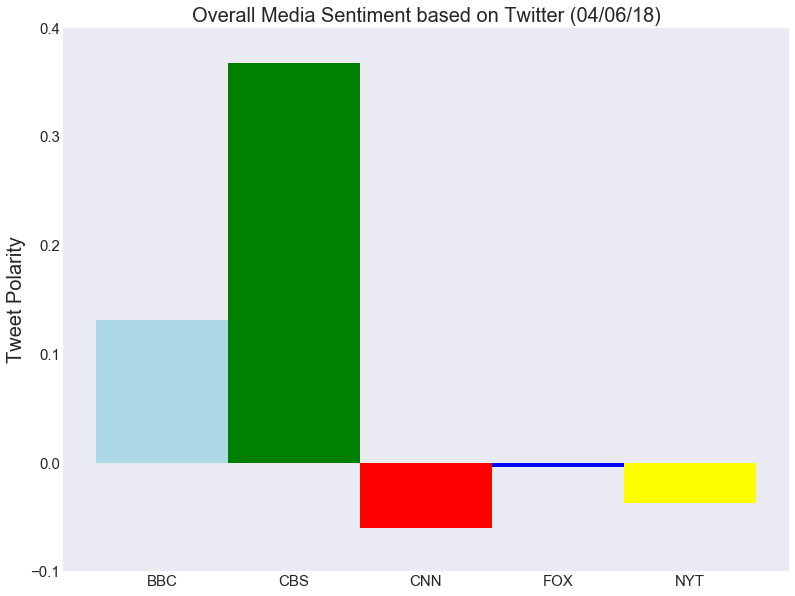

In [127]:
fig, ax  = plt.subplots(figsize =(13,10))

sns.set_style("dark")
ax.grid(False)

plt.ylim(-.1,.4)
#plt.xlim(105,-5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel("Tweet Polarity", fontsize=20)
plt.title("Overall Media Sentiment based on Twitter (04/06/18)", fontsize=20)

y = plt.bar(media_names, y_cities, color=colors, align="center", width=1)

plt.savefig('news_barplot.png')

plt.show()
